<a href="https://colab.research.google.com/github/EvenSol/testneqsim/blob/master/testGIT_idownloadpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install NeqSim

## Install NeqSim

Cloning for GIThub

In [1]:
#@title Initialize NeqSim
#@Install requred packages
!pip install py4j
!rm -rf testneqsim
!git clone https://github.com/EvenSol/testneqsim.git
!cd testneqsim
!pip install testneqsim/neqsim-0.0.1-py3-none-any.whl

    100% |████████████████████████████████| 204kB 26.3MB/s 
Cloning into 'testneqsim'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 49 (delta 2), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (49/49), done.
Processing ./testneqsim/neqsim-0.0.1-py3-none-any.whl


##Import NeqSim packages

Start by importing the NeqSim libraries and packages used for plotting.

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Vapour pressure calculations

## Calculation of vapour pressure curve

methane buble point temperature  -42.17772086617717  at pressure  1.0
methane entalpy of vaporization  (303.40514081044967, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

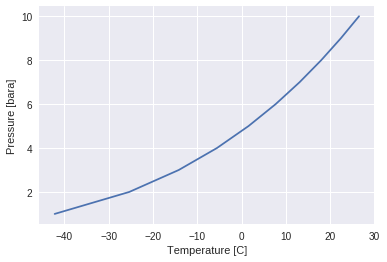

In [6]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('propane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.0)
bubt(fluid1)
print('methane buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('methane entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

## Calculation of phase envelope

Calculation of phase envelope....

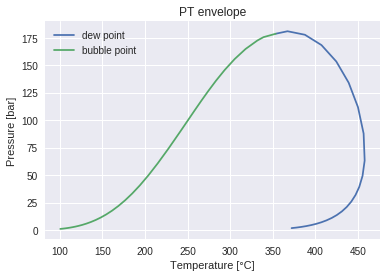

In [7]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", 1.0)
thermoSystem.addComponent("methane", 10.0)
thermoSystem.addComponent("ethane", 4.0)
thermoSystem.addComponent("propane", 2.0)
thermoSystem.addComponent("i-butane", 1.0)
thermoSystem.addComponent("n-butane", 1.0)
thermoSystem.addComponent("nC10", 1.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

# Hydrate calculations

## How to find hydrate temperature

Hydrate temperatures can be found ...

In [9]:
pressure = 150.0 #@param {type:"number"}
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,pressure)
thermoSystem.addComponent("methane", 90.0)
thermoSystem.addComponent("ethane", 10.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addComponent("water", 4.0)
thermoSystem.setHydrateCheck(True);
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.hydrateFormationTemperature()

print("Hydrate equilibrium temperature ", thermoSystem.getTemperature()-273.15, " C")

Hydrate equilibrium temperature  21.31220453897521  C
